## Import

In [1]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np

from tempfile import TemporaryFile

import os
import pickle
import random
import operator

import math

## Data set data extraction 

In [2]:
directory = r"C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//"
# binary file where we will collect all the features extracted using mfcc (Mel Frequency Cepstral Coefficients)
f = open("my.dat", 'wb')

i = 0

for folder in os.listdir(directory):
    i += 1
    if i == 11:
        break
    for file in os.listdir(directory+folder):        
        try:
            (rate, sig) = wav.read(directory+folder+"/"+file)
            mfcc_feat = mfcc(sig, rate, winlen=0.020, appendEnergy=False)
            covariance = np.cov(np.matrix.transpose(mfcc_feat))
            mean_matrix = mfcc_feat.mean(0)
            feature = (mean_matrix, covariance, i)
            pickle.dump(feature, f)
        except Exception as e:
            print('Got an exception: ', e, ' in folder: ', folder, ' filename: ', file)        

f.close()

In [3]:
# Split the dataset into training and testing sets respectively
dataset = []

def loadDataset(filename, split, trSet, teSet):
    with open('my.dat', 'rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break
    for x in range(len(dataset)):
        if random.random() < split:
            trSet.append(dataset[x])
        else:
            teSet.append(dataset[x])
trainingSet = []
testSet = []
loadDataset('my.dat', 0.66, trainingSet, testSet)

## Understand audio file using librosa

In [4]:
import librosa
import librosa.display

In [5]:
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//classical//classical.00050.wav"
data,sr=librosa.load(audio_recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

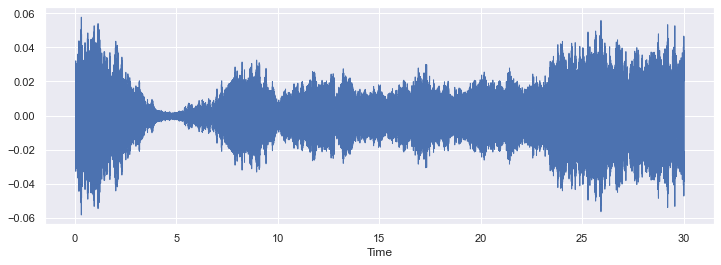

In [9]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data)
plt.show()

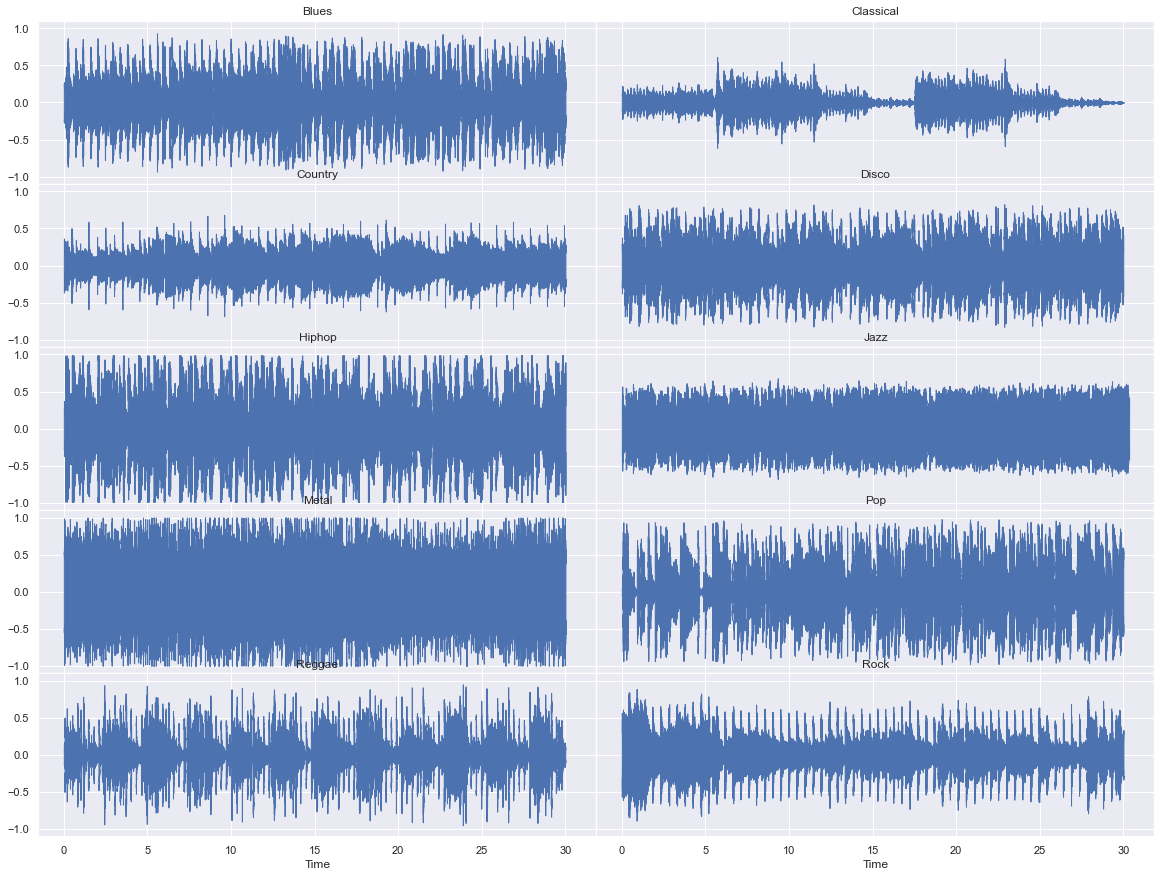

In [21]:
# Initialise the subplot function using number of rows and columns
fig = plt.figure(figsize=(20, 15), constrained_layout=False)

grid = fig.add_gridspec(5, 2, wspace=0, hspace=0)
axes = grid.subplots(sharex=True, sharey=True)


# axes[0].label_outer()
# axes[0].set(xlabel=None)
# fig.show()

# For blues
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//blues//blues.00050.wav"
data,sr=librosa.load(audio_recording)
librosa.display.waveshow(data, ax=axes[0,0])
axes[0, 0].set_title("Blues")
  
# For classical
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//classical//classical.00052.wav"
data,sr=librosa.load(audio_recording)
librosa.display.waveshow(data, ax=axes[0,1])
axes[0, 1].set_title("Classical")
  
# For country
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//country//country.00050.wav"
data,sr=librosa.load(audio_recording)
librosa.display.waveshow(data, ax=axes[1,0])
axes[1, 0].set_title("Country")
  
# For disco
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//disco//disco.00050.wav"
data,sr=librosa.load(audio_recording)
librosa.display.waveshow(data, ax=axes[1,1])
axes[1, 1].set_title("Disco")

# For hiphop
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//hiphop//hiphop.00050.wav"
data,sr=librosa.load(audio_recording)
librosa.display.waveshow(data, ax=axes[2,0])
axes[2, 0].set_title("Hiphop")

# For jazz
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//jazz//jazz.00050.wav"
data,sr=librosa.load(audio_recording)
librosa.display.waveshow(data, ax=axes[2,1])
axes[2, 1].set_title("Jazz")

# For metal
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//metal//metal.00050.wav"
data,sr=librosa.load(audio_recording)
librosa.display.waveshow(data, ax=axes[3,0])
axes[3, 0].set_title("Metal")

# For pop
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//pop//pop.00050.wav"
data,sr=librosa.load(audio_recording)
librosa.display.waveshow(data, ax=axes[3,1])
axes[3, 1].set_title("Pop")

# For reggae
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//reggae//reggae.00050.wav"
data,sr=librosa.load(audio_recording)
librosa.display.waveshow(data, ax=axes[4,0])
axes[4, 0].set_title("Reggae")

# For rock
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//rock//rock.00050.wav"
data,sr=librosa.load(audio_recording)
librosa.display.waveshow(data, ax=axes[4,1])
axes[4, 1].set_title("Rock")
  
# Combine all the operations and display
plt.show()

spectograms

C:\Users\91922\AppData\Local\Temp\ipykernel_10652\899335280.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


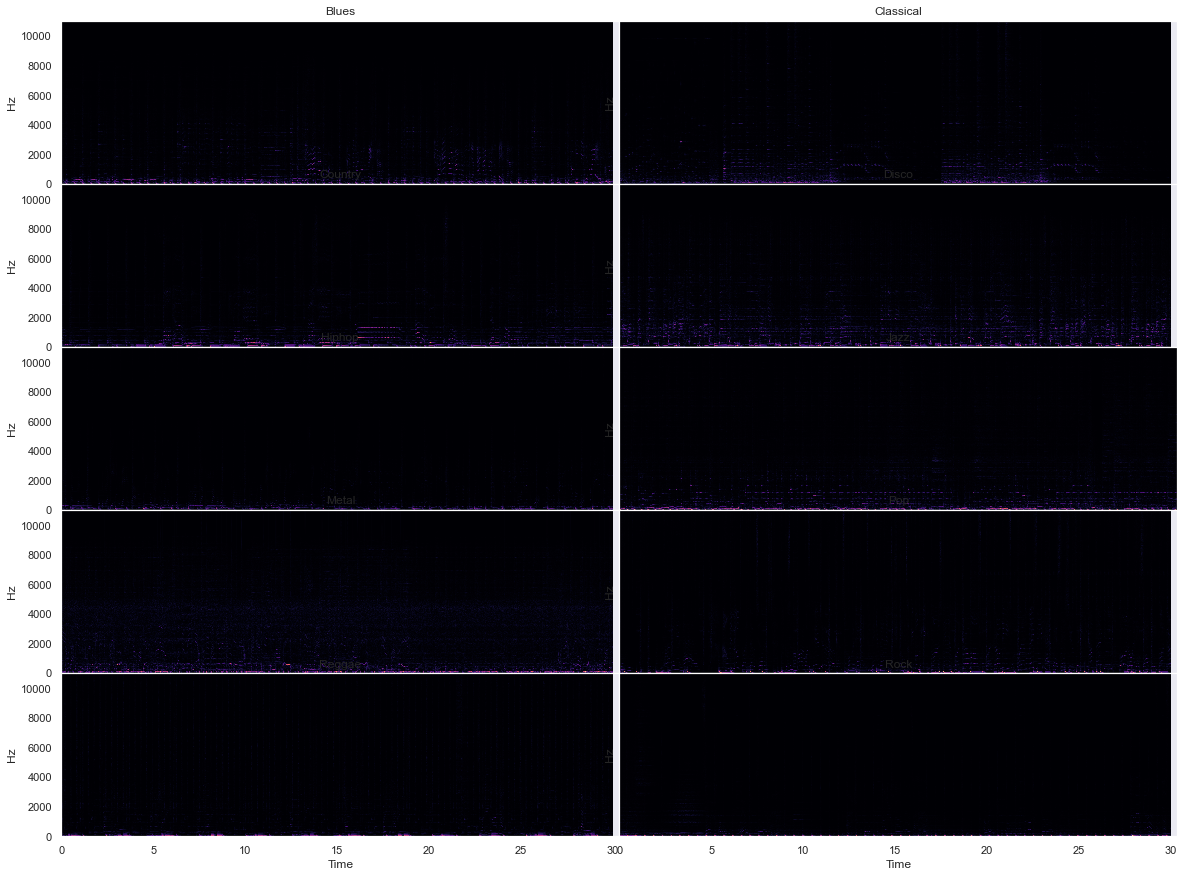

In [28]:
# Initialise the subplot function using number of rows and columns
fig = plt.figure(figsize=(20, 15), constrained_layout=False)

grid = fig.add_gridspec(5, 2, wspace=0, hspace=0)
axes = grid.subplots(sharex=True, sharey=True)


# axes[0].label_outer()
# axes[0].set(xlabel=None)
# fig.show()

# For blues
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//blues//blues.00050.wav"
data,sr=librosa.load(audio_recording)
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(stft, ax=axes[0,0], x_axis='time', y_axis='hz')
axes[0, 0].set_title("Blues")
  
# For classical
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//classical//classical.00052.wav"
data,sr=librosa.load(audio_recording)
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(stft, ax=axes[0,1], x_axis='time', y_axis='hz')
axes[0, 1].set_title("Classical")
  
# For country
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//country//country.00050.wav"
data,sr=librosa.load(audio_recording)
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(stft, ax=axes[1,0], x_axis='time', y_axis='hz')
axes[1, 0].set_title("Country")
  
# For disco
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//disco//disco.00050.wav"
data,sr=librosa.load(audio_recording)
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(stft, ax=axes[1,1], x_axis='time', y_axis='hz')
axes[1, 1].set_title("Disco")

# For hiphop
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//hiphop//hiphop.00050.wav"
data,sr=librosa.load(audio_recording)
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(stft, ax=axes[2,0], x_axis='time', y_axis='hz')
axes[2, 0].set_title("Hiphop")

# For jazz
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//jazz//jazz.00050.wav"
data,sr=librosa.load(audio_recording)
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(stft, ax=axes[2,1], x_axis='time', y_axis='hz')
axes[2, 1].set_title("Jazz")

# For metal
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//metal//metal.00050.wav"
data,sr=librosa.load(audio_recording)
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(stft, ax=axes[3,0], x_axis='time', y_axis='hz')
axes[3, 0].set_title("Metal")

# For pop
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//pop//pop.00050.wav"
data,sr=librosa.load(audio_recording)
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(stft, ax=axes[3,1], x_axis='time', y_axis='hz')
axes[3, 1].set_title("Pop")

# For reggae
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//reggae//reggae.00050.wav"
data,sr=librosa.load(audio_recording)
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(stft, ax=axes[4,0], x_axis='time', y_axis='hz')
axes[4, 0].set_title("Reggae")

# For rock
audio_recording="C://Users//91922//Documents//19102A0058//BE//ML//ML Project//genres_original//rock//rock.00050.wav"
data,sr=librosa.load(audio_recording)
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(stft, ax=axes[4,1], x_axis='time', y_axis='hz')
axes[4, 1].set_title("Rock")
  
# Combine all the operations and display
fig.show()

## Logistic Regression

In [29]:
X_trainSet = []
Y_trainSet = []
X_testSet = []
Y_testSet = []
for i in range(len(trainingSet)):
  X_trainSet.append(np.concatenate((trainingSet[i][0],trainingSet[i][1].ravel()),axis=0))
  Y_trainSet.append(trainingSet[i][2])
for i in range(len(testSet)):
  X_testSet.append(np.concatenate((testSet[i][0],testSet[i][1].ravel()),axis=0))
  Y_testSet.append(testSet[i][2])

In [30]:
X_trainSet = np.array(X_trainSet)
X_testSet = np.array(X_testSet)
Y_trainSet = np.array(Y_trainSet)
Y_testSet = np.array(Y_testSet)

In [31]:
Y_trainSet

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_trainSet,Y_trainSet)
lr.score(X_testSet,Y_testSet)

C:\Users\91922\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6340694006309149

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_trainSet)
X_testScaled = scaler.transform(X_testSet)

In [34]:
lr2 = LogisticRegression()
lr2.fit(X_trainScaled,Y_trainSet)
lr2.score(X_testScaled,Y_testSet)

C:\Users\91922\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6750788643533123

## SVM

In [35]:
X_trainSet = []
Y_trainSet = []
X_testSet = []
Y_testSet = []
for i in range(len(trainingSet)):
  X_trainSet.append(np.concatenate((trainingSet[i][0],trainingSet[i][1].ravel()),axis=0))
  Y_trainSet.append(trainingSet[i][2])
for i in range(len(testSet)):
  X_testSet.append(np.concatenate((testSet[i][0],testSet[i][1].ravel()),axis=0))
  Y_testSet.append(testSet[i][2])

In [36]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_trainSet,Y_trainSet)
svm.score(X_testSet,Y_testSet)

0.6435331230283912

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_trainSet)
X_testScaled = scaler.transform(X_testSet)

In [38]:
svm2 = SVC()
svm2.fit(X_trainScaled,Y_trainSet)
svm2.score(X_testScaled,Y_testSet)

0.6971608832807571

## KNN Classifier

In [39]:
X_trainSet = []
Y_trainSet = []
X_testSet = []
Y_testSet = []
for i in range(len(trainingSet)):
  X_trainSet.append(np.concatenate((trainingSet[i][0],trainingSet[i][1].ravel()),axis=0))
  Y_trainSet.append(trainingSet[i][2])
for i in range(len(testSet)):
  X_testSet.append(np.concatenate((testSet[i][0],testSet[i][1].ravel()),axis=0))
  Y_testSet.append(testSet[i][2])

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(metric='cosine')
knn.fit(X_trainSet,Y_trainSet)
knn.score(X_testSet,Y_testSet)

0.6088328075709779

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_trainSet)
X_testScaled = scaler.transform(X_testSet)

In [54]:
knn2 = KNeighborsClassifier(metric='cosine')
knn2.fit(X_trainScaled,Y_trainSet)
knn2.score(X_testScaled,Y_testSet)

0.6624605678233438

## Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_trainSet,Y_trainSet)
rf.score(X_testSet,Y_testSet)

0.6971608832807571

In [56]:
rf2 = RandomForestClassifier()
rf2.fit(X_trainScaled,Y_trainSet)
rf2.score(X_testScaled,Y_testSet)

0.694006309148265

## AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier()
adc.fit(X_trainSet,Y_trainSet)
adc.score(X_testSet,Y_testSet)

0.2807570977917981

In [58]:
adc2 = AdaBoostClassifier()
adc2.fit(X_trainScaled,Y_trainSet)
adc2.score(X_testScaled,Y_testSet)

0.2807570977917981